Explainer notebook for the final project in the class 02805 Social graphs and interactions at DTU, Fall 2020. 

Website: https://s153748.github.io/

# Motivation
*Description of dataset and why we chose it, goal for the end user's experience*

*Purpose*

GitHub is where over 50 million developers shape the future of software, together. The site provides hosting for software development, version control using Git and several collaboration features. As of January 2020, GitHub reports having over 40 million users and more than 190 million repositories (including at least 28 million public repositories), making it the largest host of source code in the world [1].

The aim of our project is to analyze the social network of GitHub users. We limit our focus to profiles related to the topic of machine learning, which has huge potential and untapped possibilities [2]. We will analyze the netowork with the purpose of answering the main questions:
* How are the users connected?
    - Connectivity, hubs, communities and spatial connections in the network
* What are the most popular languages?
    - Find top programming languages for netowork and communities
* How is the vibe in the coding communities? 
    - Sentiment analysis of user bios and repository descriptions
* What users are worth following?
    - Based on followers, stars, forks, repositories, activity and topics

Finally, we will present our findings from the network and text analysis using interactive visualizations hosted on a GitHub webpage (https://s153748.github.io/). The goal for the end user experience is to provide an overview of the Github network and its characteristics though answerering the above questions. Further, we want the user to be able to explore the graph of the network and its communities in different ways in order to learn more about the top machine learning developers and be inspired. 

*Dataset*

Searching for machine learning on GitHub, results in 277,787 repositories, 9,588,021 available codes, 258,336 commits, 110,957 issues, 47,434 users and 31,396 wikis. We are interested in scraping data from the owners as well as the top contributers of the top repositories matching this search.

In order to scrape data from the GitHub API, we generate a GitHub Access Key and use the tools `PyGithub`, `Requests` and `Beautiful Soup`. The scraping results in a 297.2+ KB dataset of 1585 distinct users (rows) and 23 data variables (columns). The data variables obtained from the user profiles are:
* `user_name` - user name
* `name` - full name
* `bio` - biography
* `email` - email 
* `location` - location
* `company` - company
* `hireable` - whether the user is hireable or not (true/false)
* `blog` - blog url
* `created_at` - date and time the user was created
* `updated_at` - date and time the user was updated
* `followers_count` - number of followers
* `following_count` - number of users the user is following

Further, the variabels obtained from the user’s repositories are:
* `repos` - name of repository the user is extracted from
* `owner` - name of the owner of the repository the user is extracted from
* `description` - of repository the user is extracted from
* `repos_count` - number of repositories per user
* `repos_name` - name of all repositories per user
* `total_stars` - count of stars of repositories per user
* `total_forks` - count of forks of repositories per user
* `main_language` - the language used the most in the user's repositories
* `used_languages` - all languages used in the user's repositories

The dataset is available for download here: https://github.com/s153748/s153748.github.io

# Basic stats
*Understand dataset better, choices in data cleaning and preprocessing, discuss the dataset stats (recycle the work for Project Assignment A)*

## Data preprocessing and cleaning

### Imports

In [991]:
#!pip install plotly
#!pip install altair
#!pip install googletrans
#!pip install folium
#!pip install geopandas
import pandas as pd
import numpy as np
import re
import urllib.request
import json
import os
import string  
import math
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import seaborn as sns
from seaborn import color_palette
import networkx as nx
import community
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator
from fa2 import ForceAtlas2
from PIL import Image, ImageFont
import requests
import json
import re
import plotly.express as px 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import altair as alt 
from geopy.geocoders import Nominatim
import geopandas as gpd
import folium
from folium import FeatureGroup, LayerControl, plugins, Map, Marker
from folium.plugins import FastMarkerCluster, MarkerCluster
import branca
import branca.colormap as cm
from branca.colormap import linear
from googletrans import Translator
import warnings
warnings.filterwarnings('ignore')

In [992]:
# define colors for plotting
blue = ['#f7fbff','#79b8ff','#0366d6','#044289','#05264c','#191970']

### Data scraping

In [993]:
# data scraping from Github API (...)

In [994]:
# define missing value types
missing_values = ['na', 'n/a', '-', '--']

# load scraped data
df = pd.read_csv('data/final_data.csv', converters={'following': eval,'repos_name': eval}, index_col=0, na_values = missing_values)

# display dataframe
df.head(3)

user_name         owner                                    repos  \
0  josephmisiti  josephmisiti                 awesome-machine-learning   
1          wepe          wepe                          MachineLearning   
2       ZuzooVn       ZuzooVn  machine-learning-for-software-engineers   

            name  type         company        location  \
0  Joseph Misiti  User  Math & Pencil     Brooklyn, NY   
1          wepon  User          AntFin  China Hangzhou   
2         Nam Vu  User             NaN         Vietnam   

                                                 bio            created_at  \
0        Mathematician & Co-founder of Math & Pencil  2010-04-17T21:09:13Z   
1                                                NaN  2014-10-10T14:28:18Z   
2  A Vietnamese Software Engineer who is really p...  2012-02-11T16:55:02Z   

             updated_at  ...              email followers_count  \
0  2020-10-29T18:11:39Z  ...                NaN            2610   
1  2020-11-05T15:54:10Z  ...   wepon@pku.edu.cn            4564   
2  2020-10-12T02:40:45Z  ...  zuzoovn@gmail.com            1223   

  following_count hireable  repos_count  \
0             275     True          226   
1              47      NaN           27   
2              91     True           38   

                                          repos_name total_stars  total_forks  \
0  [80s.nyc, alexa-skills-kit-js, algodeck, algor...       48727        12605   
1  [AliTianChi, CaiNiao-DemandForecast-StoragePla...        7324         5193   
2  [android-classyshark, asi-http-request, awesom...       24471         5838   

  main_language                                     used_languages  
0        Python  ['C' 'C++' 'CSS' 'CoffeeScript' 'Go' 'HTML' 'J...  
1        Python             ['C++' 'HTML' 'Java' 'Python' 'Shell']  
2        Python  ['C' 'DIGITAL Command Language' 'HTML' 'Java' ...  

[3 rows x 23 columns]

In [995]:
# get info such as shape, data types, column names, memory usage
print(df.shape)
df.info()

(1585, 23)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1585 entries, 0 to 1584
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_name        1585 non-null   object
 1   owner            1585 non-null   object
 2   repos            1585 non-null   object
 3   name             1345 non-null   object
 4   type             1585 non-null   object
 5   company          767 non-null    object
 6   location         1008 non-null   object
 7   bio              691 non-null    object
 8   created_at       1585 non-null   object
 9   updated_at       1585 non-null   object
 10  following        1585 non-null   object
 11  description      1542 non-null   object
 12  blog             752 non-null    object
 13  email            620 non-null    object
 14  followers_count  1585 non-null   int64 
 15  following_count  1585 non-null   int64 
 16  hireable         364 non-null    object
 17  repos_count      1585 

In [996]:
# convert the used_languages to a list of strings
df['used_languages'] = df['used_languages'].str.replace(' ',',').str.replace('\n','').str.replace("'","")
def stringToList(colname):
    df[colname] = [df[colname][i][1:len(df[colname][i])-1].split(',') for i in range(len(df))]
stringToList('used_languages')

# create additional variable for 'following' with only the users that exist in the 'user_name' variable already
df['following_relevant'] = ''
for i in range(len(df)):
    df['following_relevant'][i] = np.unique([link for link in df['following'][i] if link in df['user_name'].values])
    
    
    

In [997]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(f'Numeric variables:\n {numeric_cols}')

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(f'Non-numeric variables:\n {non_numeric_cols}')

Numeric variables:
 ['followers_count' 'following_count' 'repos_count' 'total_stars'
 'total_forks']
Non-numeric variables:
 ['user_name' 'owner' 'repos' 'name' 'type' 'company' 'location' 'bio'
 'created_at' 'updated_at' 'following' 'description' 'blog' 'email'
 'hireable' 'repos_name' 'main_language' 'used_languages'
 'following_relevant']


### Missing data

In [998]:
# find number of missing values
print(f'Total number of missing values: {df.isnull().sum().sum()}')

Total number of missing values: 5647


In [999]:
# find missing values for each variable
print('Total number of missing values per variable:')
df.isnull().sum()

Total number of missing values per variable:


user_name                0
owner                    0
repos                    0
name                   240
type                     0
company                818
location               577
bio                    894
created_at               0
updated_at               0
following                0
description             43
blog                   833
email                  965
followers_count          0
following_count          0
hireable              1221
repos_count              0
repos_name               0
total_stars              0
total_forks              0
main_language           56
used_languages           0
following_relevant       0
dtype: int64

In [1000]:
# find percentage of missing values
print('Missing data percentages:\n')
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    if pct_missing > 0:
        print('{} - {}%'.format(col, round(pct_missing*100)))

Missing data percentages:

name - 15.0%
company - 52.0%
location - 36.0%
bio - 56.0%
description - 3.0%
blog - 53.0%
email - 61.0%
hireable - 77.0%
main_language - 4.0%


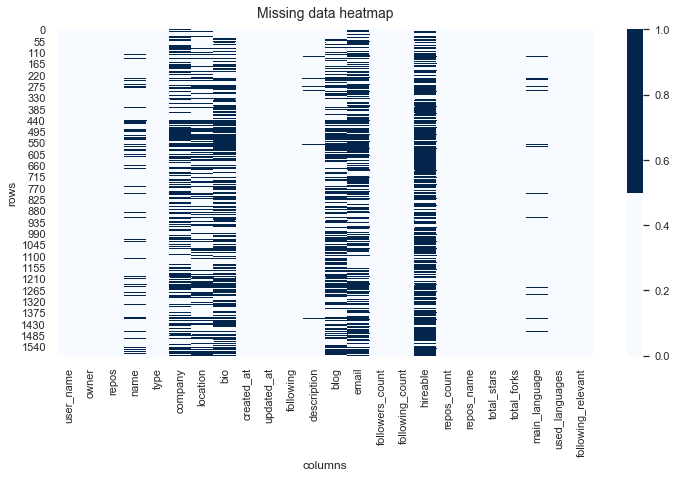

In [1001]:
# visualize the missing data with a heatmap
sns.set()
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(df[df.columns].isnull(), cmap=sns.color_palette([blue[0], blue[4]]))
heatmap.set_title('Missing data heatmap', fontsize=14, pad=12)
heatmap.set_xlabel('columns')
heatmap.set_ylabel('rows')
plt.show()

The percentages of missing data and the heatmap demonstrates the missing data patterns of the 24 variables. The dark blue color represents the missing data, as opposed to the light blue color representing data that is not missing. It is seen that the variables `name`, `company`, `location`, `bio`, `blog`, `email` and `hirable` have missing values throughout many rows, whereas `description` and `main_language` only has a few missing values. There seem to be no missing values for the numeric variables. We notice that the `hireable` variable has as much as 77 % of missing data indicating we should remove this variable.

In [1002]:
# drop variables with a lot of missing data
df = df.drop('hireable', axis=1)

# update
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

We now identify the missing values situations among the 1585 observations.

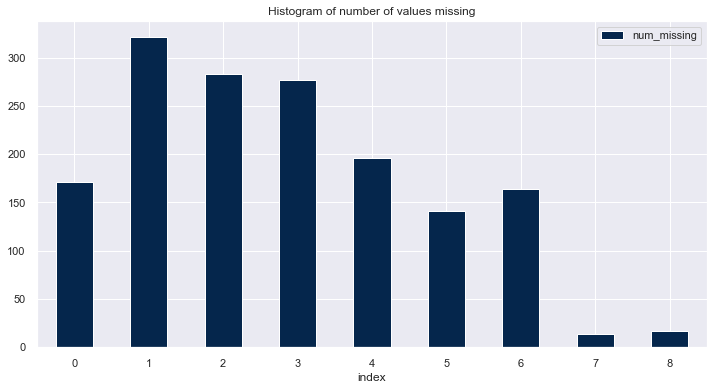

In [1003]:
# first create missing indicator for variables with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:  
        df['{}_ismissing'.format(col)] = missing

# based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)
sns.set()
df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(
    x='index', y='num_missing', figsize=(12, 6), color=blue[4], title='Histogram of number of values missing')
plt.xticks(rotation=0)
plt.show()

It is seen that there are about 60 observations with no missing values and close to 300 observations with two missing values. We decide not to remove any of the observations, since none of them have more than 9 missing values (out of 24), which means there are still a lot of useful data from the remaining values that are not missing.

To handle the missing data of the categorical values, we have different options:
* Drop the missing values
* Replace missing values with the mode (the most frequent value) of the data that is not missing
* Fill missing values with empty strings "" indicating the data is missing

Since we don't want to want to keep as much information as possible while not "manipulating" the results, we choose the last option.  

In [1004]:
for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:
        print('Filling missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        df[col] = df[col].fillna('')

Filling missing values for: name
Filling missing values for: company
Filling missing values for: location
Filling missing values for: bio
Filling missing values for: description
Filling missing values for: blog
Filling missing values for: email
Filling missing values for: main_language


In [1005]:
# drop columns used to detect missing values
cols_to_drop = ['num_missing', 'name_ismissing', 'company_ismissing', 'location_ismissing', 'bio_ismissing',
                'description_ismissing', 'blog_ismissing', 'email_ismissing', 'main_language_ismissing']
df = df.drop(cols_to_drop, axis=1)

# update
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

In [1006]:
# any missing values?
df.isnull().values.any()

False

### Unnecessary data
The aim is now to find unnecessary data that does not add value because it is uninformative, duplicate, repetitive or irrelevant.

In [1007]:
# check for duplicates
try: 
    df.drop('user_name', axis=1).drop_duplicates()
except:
    print('No duplicates found')

No duplicates found


In [1008]:
# find percentage of the same value for each variable
repetitive_cols = []
for col in df.columns:
    top_pct = (df[col].value_counts()/len(df.index)).iloc[0]
    print('{0}: {1:.1f}%'.format(col, top_pct*100))
    if top_pct > 0.5:
        repetitive_cols.append(col)

user_name: 0.1%
owner: 10.0%
repos: 6.3%
name: 15.1%
type: 100.0%
company: 51.6%
location: 36.4%
bio: 56.4%
created_at: 0.1%
updated_at: 0.1%
following: 31.2%
description: 2.7%
blog: 52.6%
email: 60.9%
followers_count: 9.9%
following_count: 31.2%
repos_count: 3.4%
repos_name: 2.1%
total_stars: 25.6%
total_forks: 28.6%
main_language: 42.1%
used_languages: 3.5%
following_relevant: 1.1%


In [1009]:
# look at the top values of the most repetitive variables
for col in repetitive_cols:
    display(df[col].value_counts()[:5])

User    1585
Name: type, dtype: int64

              818
Microsoft      57
Google         36
Amazon         14
@Microsoft     13
Name: company, dtype: int64

                             894
Software Engineer              4
Data Scientist                 4
Machine Learning Engineer      2
Google Brain                   2
Name: bio, dtype: int64

                            833
https://aws.amazon.com        2
https://aws.amazon.com/       2
http://www.microsoft.com      2
http://viralfsharp.com        2
Name: blog, dtype: int64

                                   965
juanjomadrigal326@gmail.com          1
jan-hendrik.menke@uni-kassel.de      1
marwan@unity3d.com                   1
jaykmody@gmail.com                   1
Name: email, dtype: int64

The variable `type` has only one distinct value, that is user, and is thus 100 % repetitive. Since all observations have the same type, this variable does not contribute with any value and can be removed from the dataset. 

For the other repetitive variables, a lot of values that are blank representing the information was not provided. For example, `email` has 60.9 % of its values as blank, meaning the email was not provided by the GitHub user, whereas the rest of the values are unique emails. Since the values of the variables are not very repetitive besides from the blanks, we decide to keep them. 

In [1010]:
# drop the variable 'type'
df = df.drop('type', axis=1)

# update
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

### Inconsistent data
Though looking at the repetitive values above, we spot that both Microsoft and @Microsoft was on the list of companies, suggesting we should remove the '@'. We expect a lot of different punctuations and have look at distinct values to detect which we want to remove, as we want to keep the '&' in the company Math & Pencil for example. 

We clean the variables `company` and `location` by removing selected punctuations, converting the text to lower case and stripping for blanks. The variables `description` and `bio` with larger amounts of text will be cleaned for the purpose of the sentiment analysis in Section 3.5. 

In [1011]:
np.unique(df['company'])

array(['', ' https://github.com/google', '&Ranj', '.NET Foundation',
       '140.113.0.0', '2021 应届生｜Alibaba',
       '84.51°; Wright State University; University of Cincinnati; @koalaverse ',
       '@15five ', '@1Password', '@1debit ', '@AWS', '@Arrikto',
       '@Azure ', '@BingusDingo ', '@BlockSigner ', '@Bytedance',
       '@CSCfi ', '@CiscoAI ', '@Comcast ', '@ContinuumIO', '@DevFactory',
       '@Dropbox', '@ESA_DataScience', '@EnzymeCorp ', '@EpisourceLLC',
       '@EpistasisLab', '@EthicalML @SeldonIO ', '@Evomo',
       '@FormidableLabs', '@GetStream @yesfeedme @exercism @gofrs ',
       '@GitbookIO ', '@GoDataDriven', '@Google', '@Gradiant', '@Huawei',
       '@IBM', '@IBM - @CODAIT', '@IDeliverable ', '@LITrans',
       '@MateLabs ', '@MegEngine', '@Meituan-Dianping', '@MichiganNLP',
       '@Microsoft', '@Microsoft ', '@Microsoft @dotnet ',
       '@MindOrksOpenSource', '@NVIDIA',
       '@NeatNait @TribalScale @JSarmy ', '@Neuraxio', '@ONE-LOGIC ',
       '@OpenMined @Hy

In [1012]:
np.unique(df['location'])

array(['', ' india', '/dev/tcp/127.0.0.1/443', '0x7ffffffeffff',
       '127.0.0.1', 'Aberdeen, UK', 'Aberdeen, United Kingdom',
       'Adelaide', 'Adelaide, Australia',
       'Albacete, Castilla-La Mancha, Spain', 'Alexandria, Egypt',
       'Algeria', 'Almaty, Kazakhstan', 'Amherst', 'Amherst, MA',
       'Amritsar', 'Amsterdam', 'Amsterdam ', 'Amsterdam, Netherlands',
       'Ann Arbor', 'Ann Arbor, MI, USA', 'Arlington, VA', 'Ashburn, VA',
       'Asheville, NC, USA', 'Athens', 'Athens, Greece', 'Athens, Ohio',
       'Atlanta, GA', 'Atlanta, Georgia', 'Auckland, New Zealand',
       'Augsburg', 'Austin, TX', 'Australia', 'Austria', 'BUPT',
       'Bangalore', 'Bangalore India', 'Bangalore, India',
       'Bansko, Bulgaria', 'Barcelona', 'Barcelona, Spain',
       'Bavaria, Germany', 'Bay Area', 'Bay Area, California',
       'Bay Area, California, USA', 'Beijing', 'Beijing, CN',
       'Beijing, China', 'Beijing, China ', 'Beijing, China.',
       'Belarus, Minsk', 'Belgium', 'B

In [1013]:
def remove_punctuation(text):
    punctuation = '!"#$%\'()*+./:;<=>?@[\\]^_`´{|}~¨°⇄·'
    no_punct = [words for words in text if words not in punctuation]
    words_wo_punct = ''.join(no_punct)
    return words_wo_punct

df['company'] = df['company'].str.lower().str.strip().apply(lambda x: remove_punctuation(x))
df['location'] = df['location'].str.lower().str.strip().apply(lambda x: remove_punctuation(x))

In [1014]:
# remove some selected values
inconsistent = ['0x7ffffffeffff', '127001', '14011300', 'devtcp127001443']
for word in inconsistent:
    df['company'] = df['company'].replace(word,'')
    df['location'] = df['location'].replace(word,'')

In [1015]:
np.unique(df['company'])

array(['', '&ranj', '15five', '1debit', '1password', '2021 应届生｜alibaba',
       '8451 wright state university university of cincinnati koalaverse',
       'acquia', 'air force', 'airbnb', 'aix marseille university',
       'alan turing institute, firmai', 'alan-eu',
       'alexa awslabs aws dmlc', 'algo lambda', 'algorithmia',
       'alibaba aliyun', 'amazon', 'amazon web services',
       'amazon web services, llc', 'amazon, inc', 'amazoncom', 'amd',
       'andela', 'andersen construction', 'ant group', 'antfin', 'apple',
       'applied materials', 'arm', 'arrikto', 'artific intelligence',
       'athenahealth', 'athenian', 'athenianco',
       'athenianco fragiletech src-d', 'aussems software', 'automl',
       'auvzhcet amu-oss', 'avanade', 'awesome7com', 'aws', 'aws ai',
       'aws awslabs', 'aws labs', 'awsdocs', 'awslabs', 'awslabs aws',
       'azure', 'barco', 'bbd', 'bcg gamma', 'benchco', 'bigdata2',
       'bingusdingo', 'blocksigner', 'bolcom',
       'bommarito consul

In [1016]:
np.unique(df['location'])

array(['', 'aberdeen, uk', 'aberdeen, united kingdom', 'adelaide',
       'adelaide, australia', 'albacete, castilla-la mancha, spain',
       'alexandria, egypt', 'algeria', 'almaty, kazakhstan', 'amherst',
       'amherst, ma', 'amritsar', 'amsterdam', 'amsterdam, netherlands',
       'ann arbor', 'ann arbor, mi, usa', 'arlington, va', 'ashburn, va',
       'asheville, nc, usa', 'athens', 'athens, greece', 'athens, ohio',
       'atlanta, ga', 'atlanta, georgia', 'auckland, new zealand',
       'augsburg', 'austin, tx', 'australia', 'austria', 'bangalore',
       'bangalore india', 'bangalore, india', 'bansko, bulgaria',
       'barcelona', 'barcelona, spain', 'bavaria, germany', 'bay area',
       'bay area, california', 'bay area, california, usa', 'beijing',
       'beijing, china', 'beijing, cn', 'belarus, minsk', 'belgium',
       'belgrade, serbia', 'bellevue', 'bellevue wa usa', 'bellevue, wa',
       'bellevue, washington', 'belmont, wa',
       'belo horizonte, mg - brazil',

We make sure the format of the datetime variables are correct and create additional variables for year, month and day, that is easier to work with in the analysis. 

In [1017]:
df['created_at'] = pd.to_datetime(df['created_at'], format='%Y-%m-%d')
df['created_at_year'] = df['created_at'].dt.year
df['created_at_month'] = df['created_at'].dt.month
df['created_at_weekday'] = df['created_at'].dt.weekday

df['updated_at'] = pd.to_datetime(df['updated_at'], format='%Y-%m-%d')
df['updated_at_year'] = df['updated_at'].dt.year
df['updated_at_month'] = df['updated_at'].dt.month
df['updated_at_weekday'] = df['updated_at'].dt.weekday

In [1018]:
# save clean data as csv
#df.to_csv(r'data/df_clean.csv', index = False)

## Exploratory data analysis
We now explore our cleaned dataset on more detail.

In [1019]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1585 entries, 0 to 1584
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   user_name           1585 non-null   object             
 1   owner               1585 non-null   object             
 2   repos               1585 non-null   object             
 3   name                1585 non-null   object             
 4   company             1585 non-null   object             
 5   location            1585 non-null   object             
 6   bio                 1585 non-null   object             
 7   created_at          1585 non-null   datetime64[ns, UTC]
 8   updated_at          1585 non-null   datetime64[ns, UTC]
 9   following           1585 non-null   object             
 10  description         1585 non-null   object             
 11  blog                1585 non-null   object             
 12  email               1585 non-null 

We start by looking at some basic descriptive statistics for the relevant numerical variables in the dataset.

In [1020]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values[:6]
round(df[numeric_cols].describe(),2)

followers_count  following_count  repos_count  total_stars  \
count          1585.00          1585.00      1585.00      1585.00   
mean            226.75            25.72        72.03       874.09   
std            1271.32            76.70       929.20      5914.07   
min               0.00             0.00         0.00         0.00   
25%               4.00             0.00         9.00         0.00   
50%              20.00             4.00        22.00         9.00   
75%              83.00            19.00        47.00       103.00   
max           36310.00          1255.00     36555.00    150327.00   

       total_forks  created_at_year  
count      1585.00          1585.00  
mean        287.01          2013.86  
std        1813.50             2.71  
min           0.00          2008.00  
25%           0.00          2012.00  
50%           5.00          2014.00  
75%          42.00          2016.00  
max       42945.00          2020.00

### Distributions

Since it is a bit difficult to interpret all the above values at once, we visualize the distributions in the following using histograms and box plots. This will make it easier to detect outliers, i.e. data that is distinctively different from other observations.

In [826]:
# plot histogram
for col in numeric_cols:
    fig = px.histogram(df, x=col, hover_data=[col], nbins=100, labels={'x':col, 'y':'count'}, marginal="rug")
    fig.update_layout(height=400, width=750, title_text=f'Histogram of {col}')
    fig.show()

In [827]:
# plot boxplot
for col in numeric_cols:
    fig = px.box(df, y=col, hover_data=[col], points="all", notched=True)
    fig.update_layout(height=400, width=750, title_text=f'Boxplot of {col}')
    fig.show()

From the above plots, a lot of outliers are detected, except for `created_at_year`, which makes sense. Since our purpose of this preliminary analysis is to explore the data, there is no need to remove the outliers. Besides, since we are looking at differences of individual users, it is actually quite interesting to include e.g. the user that has way more followers, repos, stars or forks than the other users. 

We investigate some of the non-numeric variables using bar charts. 

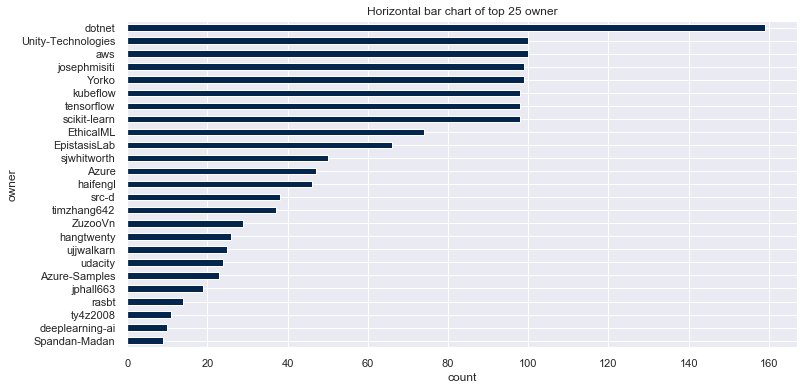

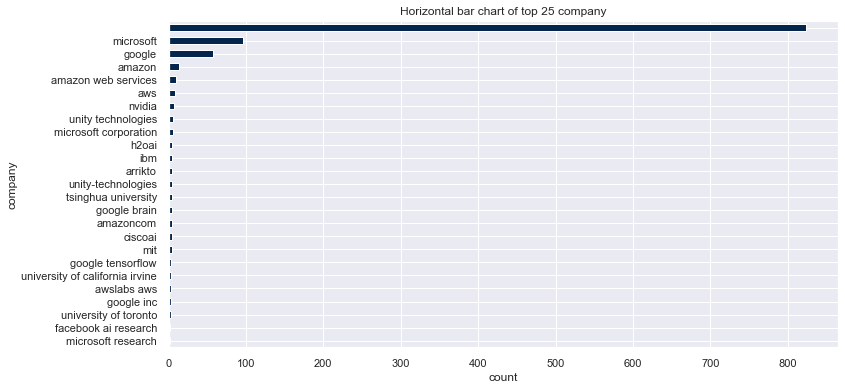

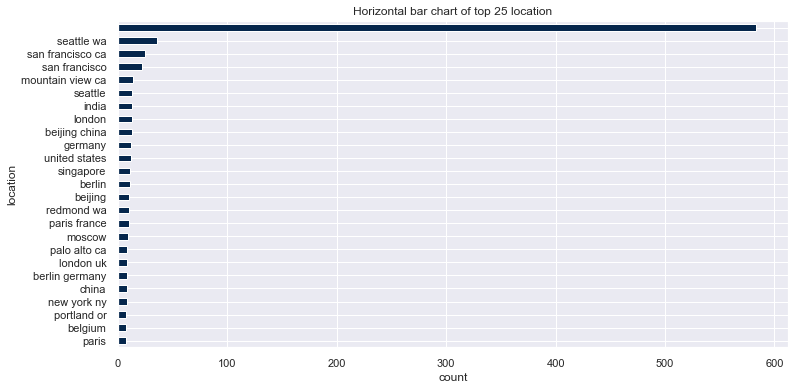

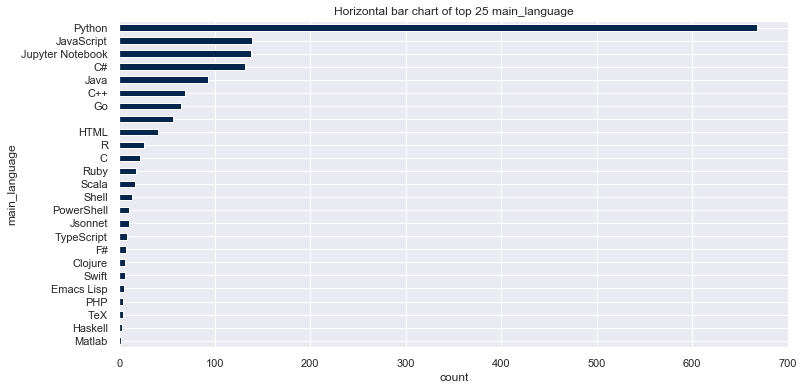

In [663]:
def bar_charts(cols):
    for col in cols:
        df[col].value_counts()[:25].plot.barh(color=blue[4], figsize=(12,6))
        plt.title(f'Horizontal bar chart of top 25 {col}')
        plt.gca().invert_yaxis()
        plt.xlabel('count')
        plt.ylabel(col)
        plt.show()
        
bar_charts(['owner', 'company', 'location', 'main_language'])

### Correlation

We investigate numeric variables against one another to reveal potential pairwise relationships in the data. We visualize the correlation using a scatter matrix and heat map.

In [664]:
corr = px.scatter_matrix(df, dimensions=numeric_cols, title='Correlation', height=750, width=850)
corr.show()

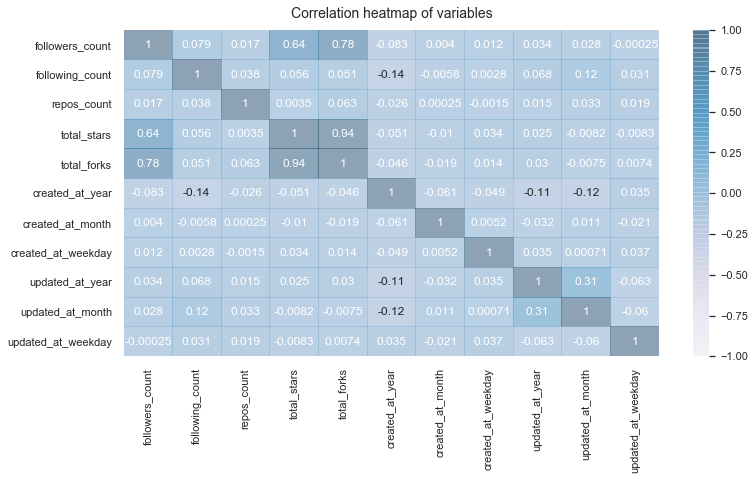

In [665]:
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='PuBu', alpha=0.4)
heatmap.set_title('Correlation heatmap of variables', fontsize=14, pad=12)
plt.show()

# Tools, theory and analysis
*Structure:*
* Explain the overall idea
* Analysis step 1-n: explain what you're interested in, explain the tool, apply the tool, discuss the outcome

*Content:*
* Explain work with text, including regular expressions, unicode, etc.
* Describe network science tools and data analysis strategies used, how those network science measures work, and why the tools you've chosen are right for the problem
* How did you use the tools to understand your dataset?

## Network generation

In [666]:
# store the network of users with DiGraph
G = nx.DiGraph()

# add nodes as users
G.add_nodes_from(df['user_name'].values)

# add edges as users following each other 
for row in df.iterrows():
    z = [(row[1]['user_name'], other_node) for other_node in row[1]['following_relevant']]
    G.add_edges_from(z)
    
# extract giant connected component 
largest_cc = max(nx.weakly_connected_components(G), key=len)
GCC = G.subgraph(largest_cc)

## Network analysis

### Degree centrality
The assumption of important nodes have many connections is made here. We first consider the total network. 

In [667]:
print(f"Number of nodes in network graph: {G.number_of_nodes()}")
print(f"Number of edges in network graph: {G.number_of_edges()}")

Number of nodes in network graph: 1585
Number of edges in network graph: 2092


In [668]:
# find highest in-degree nodes in network
df['in_degree'] = df['user_name'].apply(lambda x: G.in_degree(x))
print('Top 5 in-degree nodes')
display(df.sort_values(by=['in_degree'], ascending=False)[['user_name','name','in_degree']].head())

# find highest out-degree nodes in network
df['out_degree'] = df['user_name'].apply(lambda x: G.out_degree(x))
print('Top 5 out-degree nodes')
display(df.sort_values(by=['out_degree'], ascending=False)[['user_name','name','out_degree']].head())

# find highest connected (in and out-degree) nodes
df['degree'] = df['user_name'].apply(lambda x: G.degree(x))
print('Top 5 degree nodes')
display(df.sort_values(by=['degree'], ascending=False)[['user_name','name','degree']].head())

Top 5 in-degree nodes


user_name               name  in_degree
367    amueller    Andreas Mueller         67
417     ogrisel     Olivier Grisel         63
574    fchollet   François Chollet         58
26   llSourcell        Siraj Raval         56
3         rasbt  Sebastian Raschka         55

Top 5 out-degree nodes


user_name           name  out_degree
1178          yupbank        Peng Yu          68
575          feihugis         Fei Hu          43
1124        gaocegege         Ce Gao          42
1320  silverstone1903                         41
1042     justinormont  Justin Ormont          36

Top 5 degree nodes


user_name               name  degree
367   amueller    Andreas Mueller      83
417    ogrisel     Olivier Grisel      82
1178   yupbank            Peng Yu      72
155    soumith   Soumith Chintala      64
3        rasbt  Sebastian Raschka      60

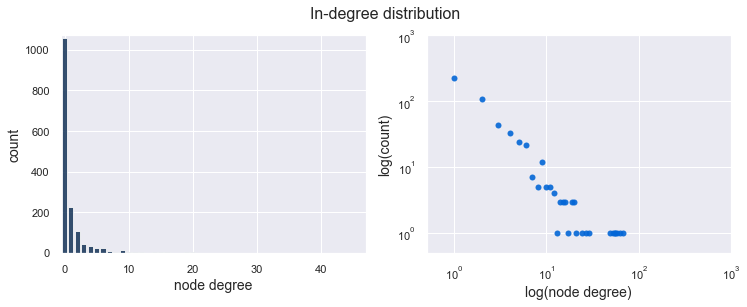

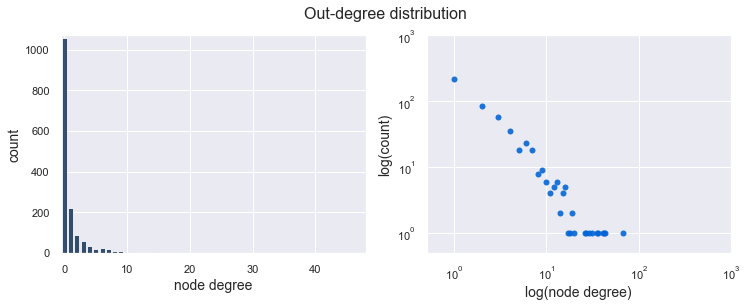

In [669]:
def degree_distribution(G, mode):
    
    # find in or out degrees of network
    if mode.lower() == 'in':
        degree_sequence = [d for n, d in G.in_degree()]
    else:
        degree_sequence = [d for n, d in G.out_degree()]
    # find min and max of degrees     
    dmax = max(degree_sequence)
    dmin = min(degree_sequence)
    
    # compute frequencies of degrees distribution
    counts, bins = np.histogram(degree_sequence, bins = np.arange(dmin-0.5, dmax+1.5,1))
    
    # set style, figure size and title
    sns.set()
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [12,4])
    fig.suptitle(mode+'-degree distribution',fontsize=16)
    
    # plot histogram 
    ax1.bar(np.arange(dmin, dmax+1,1), counts, color=blue[4], alpha=0.8)
    ax1.set_xlim(-0.5, dmax-20)
    ax1.set_ylim(-0.5, max(counts)+10)
    ax1.set_xlabel('node degree',fontsize=14)
    ax1.set_ylabel('count',fontsize=14)
    
    # plot scatter plot on log-log scale
    ax2.loglog(np.arange(dmin, dmax+1,1), counts, 'o', color=blue[2], alpha=0.9)
    ax2.set_xlim(0.5, 10**3)
    ax2.set_ylim(0.5, 10**3)
    ax2.set_xlabel('log(node degree)',fontsize=14)
    ax2.set_ylabel('log(count)',fontsize=14)
    plt.show()
    
degree_distribution(G,'In')
degree_distribution(G,'Out')

We now look at the GCC.

In [670]:
print(f"Number of nodes in GCC: {GCC.number_of_nodes()}")
print(f"Number of edges in GCC: {GCC.number_of_edges()}")

Number of nodes in GCC: 737
Number of edges in GCC: 2072


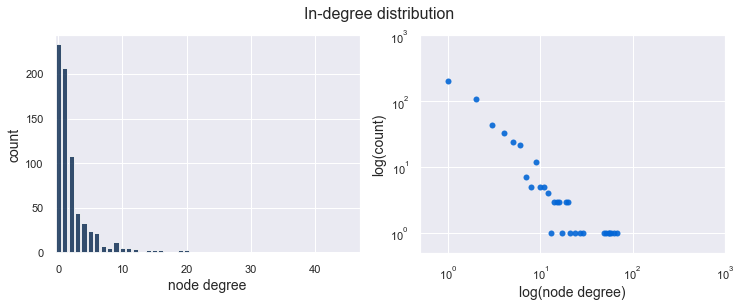

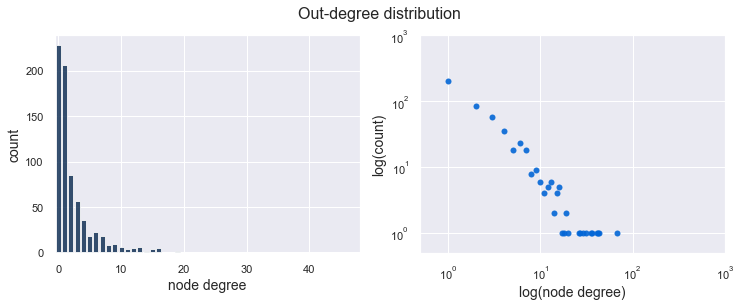

In [671]:
degree_distribution(GCC,'In')
degree_distribution(GCC,'Out')

### Connectivity

In [672]:
top_followers = df.sort_values(by='followers_count', axis=0, ascending=False)
fig = px.bar(top_followers[:100], x='user_name', y='followers_count', hover_data=['followers_count'])
fig.update_layout(height=450, width=750, title_text='The most popular users')
fig.show()

In [673]:
top_following = df.sort_values(by='following_count', axis=0, ascending=False)
fig = px.bar(top_following[:100], x='user_name', y='following_count', hover_data=['following_count'])
fig.update_layout(height=450, width=750, title_text='Fan users following other users the most')
fig.show()

In [674]:
# determine what percentage of followers top 1% of users get
top = int(len(top_followers) * 0.01)
perc = sum(top_followers.iloc[0: top,:].loc[:, 'followers_count'])/sum(top_followers.followers_count)*100
print(f'1 % of the top users have {round(perc,1)} % of the followers')

1 % of the top users have 42.2 % of the followers


In [675]:
top_followers = df.sort_values(by='followers_count', axis=0, ascending=False)
fig = px.bar(top_followers[:100], x='user_name', y='followers_count', hover_data=['followers_count'])
fig.update_layout(height=450, width=750, title_text='The most popular users')
fig.show()

In [676]:
top_stars = df.sort_values(by='total_stars', axis=0, ascending=False)
fig = px.bar(top_stars[:100], x='user_name', y='total_stars', hover_data=['total_stars'])
fig.update_layout(height=450, width=750, title_text='Users with the most stars')
fig.show()

In [677]:
top_forks = df.sort_values(by='total_forks', axis=0, ascending=False)
fig = px.bar(top_forks[:100], x='user_name', y='total_forks', hover_data=['total_forks'])
fig.update_layout(height=450, width=750, title_text='Users with the most forks')
fig.show()

In [678]:
top_repos = df.sort_values(by='repos_count', axis=0, ascending=False)
fig = px.bar(top_repos[:100], x='user_name', y='repos_count', hover_data=['repos_count'])
fig.update_layout(height=450, width=750, title_text='Users with the most repositories')
fig.show()

## Network visualization

In [679]:
# convert to undirected graph
giant = GCC.to_undirected()

# scale node-size according to degree
d = dict(giant.degree)
sizes = [v * 10 for v in d.values()]

# specify settings for the Force Atlas 2 algorithm
forceatlas2 = ForceAtlas2(
    # behavior alternatives
    outboundAttractionDistribution=True, # dissuade hubs
    linLogMode=False,  
    adjustSizes=False,
    edgeWeightInfluence=1.0,

    # performance
    jitterTolerance=1.0,  # tolerance
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    multiThreaded=False,  

    # tuning
    scalingRatio=2.0,
    strongGravityMode=False,
    gravity=1.0,

    # log
    verbose=True)

# get positions based on theForce Atlas 2 algorithm
positions = forceatlas2.forceatlas2_networkx_layout(giant, pos=None, iterations=3000)

100%|██████████| 3000/3000 [00:13<00:00, 214.36it/s]

BarnesHut Approximation  took  4.78  seconds
Repulsion forces  took  8.14  seconds
Gravitational forces  took  0.10  seconds
Attraction forces  took  0.08  seconds
AdjustSpeedAndApplyForces step  took  0.40  seconds


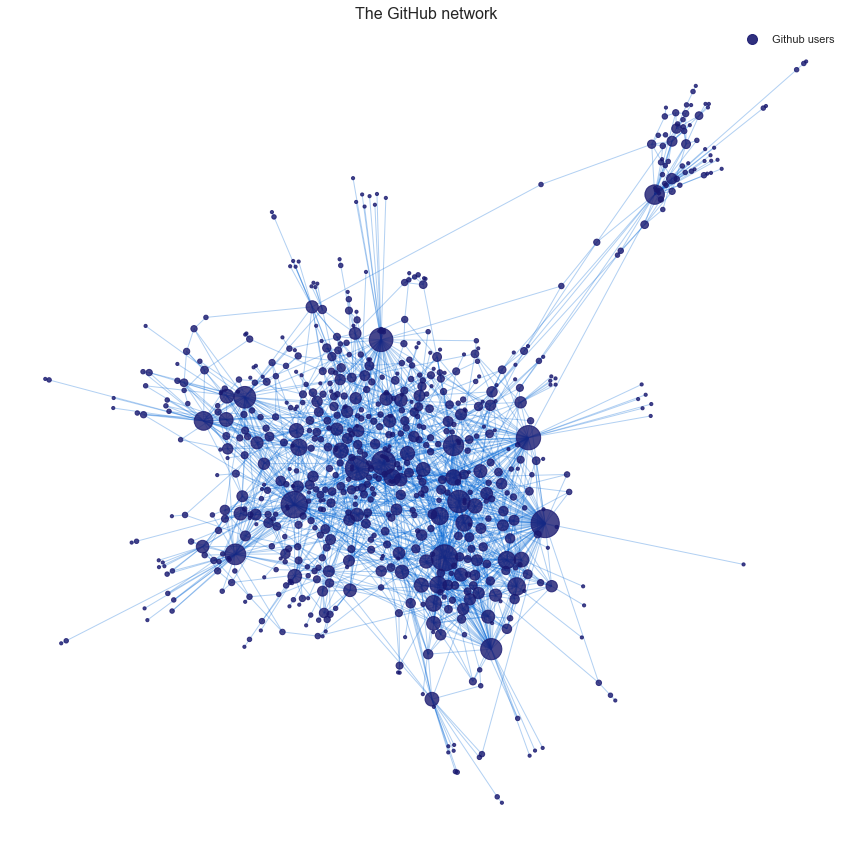

In [680]:
# set style, figure size and title
sns.set()
fig = plt.figure(figsize=(15,15))
plt.title('The GitHub network', fontsize=16)

# draw network
nx.draw_networkx_nodes(giant, positions, node_color=blue[5], alpha=0.8, node_size=sizes)
nx.draw_networkx_edges(giant, positions, edge_color=blue[2], alpha=0.3)
 
# create legend and remove axes 
plt.scatter([], [], c=blue[5], alpha=0.9, s=100, label='Github users')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1)
plt.axis('off')

plt.show()
#fig.savefig('network.png', facecolor=fig.get_facecolor(), transparent=True)

## Location

In [ ]:
# select only rows with a location given
location_df = df
location_df['location'] = location_df['location'].replace(r'^\s*$', np.nan, regex=True)
location_df = location_df[location_df['location'].notna()]

geolocator = Nominatim(user_agent='my_app')
locations = list(location_df['location'])

# extract coordinate location
lats = []
lons = []
geos = []
exceptions = []

for loc in locations:
    try:
        location = geolocator.geocode(loc)
        lats.append(location.latitude)
        lons.append(location.longitude)
        geos.append(location.address)
        print(location.address)
    except:
        print('Exception:', loc)
        exceptions.append(loc)
        
print(f'Locations found: {len(geos)} - {round(len(geos)/len(locations)*100,1)} %')
print(f'Locations not found: {len(exceptions)} - {round(len(exceptions)/len(locations)*100,1)} %')

In [ ]:
exceptions

In [ ]:
# find out what '東京都,香港, москва' means
print(str(exceptions[6])[4:6])

translator = Translator()
print(translator.translate('香港').text)

In [ ]:
# make corrections to include some of the exceptions
location_df['location'] = location_df['location'].replace('granada, spain, europe','granada, spain')
location_df['location'] = location_df['location'].replace('new yorkharare','new york')
location_df['location'] = location_df['location'].replace('san diego  stockholm','stockholm')
location_df['location'] = location_df['location'].replace('sunnyvale, ca  st louis, mo','missouri')
location_df['location'] = location_df['location'].replace('palo alto, californa','california')
location_df['location'] = location_df['location'].replace('haidian dist, beijing, china','beijing, china')
location_df['location'] = location_df['location'].replace('huazhong university of sci & tech','wuhan, china')
location_df['location'] = location_df['location'].replace('milkywaysunearthitalyflorence','florence, italy')
location_df['location'] = location_df['location'].replace('san diego, ca by way of texas','san diego')
location_df['location'] = location_df['location'].replace('東京都,香港, москва','hong kong')

In [ ]:
locations = list(location_df['location'])
lats = []
lons = []
geos = []
exceptions = []

for loc in locations:
    try:
        location = geolocator.geocode(loc)
        lats.append(location.latitude)
        lons.append(location.longitude)
        geos.append(location.address)
        print(location.address)
    except:
        print('Exception:', loc)
        exceptions.append(loc)
        
print(f'Locations found: {len(lats)} - {round(len(lats)/len(locations)*100,1)} %')
print(f'Locations not found: {len(exceptions)} - {round(len(exceptions)/len(locations)*100,1)} %')

In [ ]:
# remove the locations not found
map_location_df = location_df[~location_df.location.isin(exceptions)]

map_location_df['latitude'] = lats
map_location_df['longitude'] = lons
map_location_df['address'] = geos
map_location_df = map_location_df.reset_index(drop=True)

map_location_df['following_relevant_loc'] = ''
for i in range(len(map_location_df)):
    try:
        map_location_df['following_relevant_loc'][i] = np.unique([link for link in map_location_df['following'][i] if link in map_location_df['user_name'].values])
    except: 
        map_location_df['following_relevant_loc'][i] = []

In [ ]:
# visualize with plotly's scatter_geo map
m = px.scatter_geo(map_location_df, lat='latitude', lon='longitude',
                   color='total_stars', size='followers_count',
                   hover_data=['user_name','followers_count'],
                   title='Locations of top users',
                   width=800, height=500)
m.show()

In [983]:
# base map
m = folium.Map(tiles=None)

# add tile layers to the map
folium.TileLayer('cartodbpositron', show=True, name="light").add_to(m)
folium.TileLayer('cartodbdark_matter',  show=False, name="dark").add_to(m)
folium.TileLayer('openstreetmap', show=False, name="color").add_to(m)

# add location marker clusters
mc = MarkerCluster(name='User locations')
df = map_location_df.dropna(subset=['latitude','longitude']).reset_index(drop=True)
sw = map_location_df[['latitude','longitude']].min().values.tolist()
ne = map_location_df[['latitude','longitude']].max().values.tolist()
m.fit_bounds([sw, ne]) 

# create marker at locations
for lat, lon, location, user_name, followers, following, stars in zip(map_location_df['latitude'], map_location_df['longitude'], map_location_df['location'], map_location_df['user_name'],
                                                                      map_location_df['followers_count'], map_location_df['following_count'], map_location_df['total_stars']):
    text = folium.Html('User name: {}<br> Location: {}<br> Followers: {}<br> Following: {}<br> Stars: {}<br>'.format(user_name, location, followers, following, stars), script=True)
    popup = folium.Popup(text, max_width=300)
    folium.CircleMarker(location=[lat, lon], 
                        radius=2,
                        weight=5,
                        color='#081d58', 
                        fill_color='#081d58', 
                        fill = True,
                        popup=popup,
                        tooltip='Click on GitHub user'
                        ).add_to(mc)
mc.add_to(m)

# add layer control
folium.LayerControl('topleft', collapsed=True).add_to(m) 

m

In [ ]:
loc = [(40.720, -73.993), (40.721, -73.996)]

folium.PolyLine(loc,
                color='#081d58',
                weight=10,
                opacity=0.8).add_to(m)

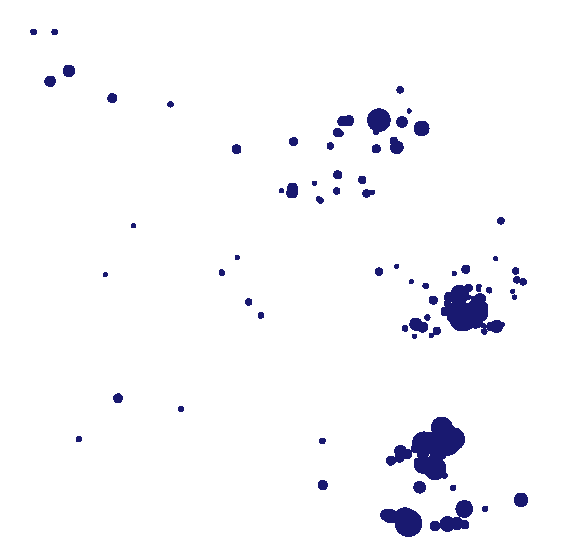

In [990]:
# create network with locations
location_G = nx.DiGraph()

location_G.add_nodes_from(map_location_df['user_name'].values, 
                          pos=(map_location_df['latitude'].values, map_location_df['longitude'].values))

for row in map_location_df.iterrows():
    edgelist = [(row[1]['user_name'], other_node) for other_node in row[1]['following_relevant_loc']]
    location_G.add_edges_from(edgelist)
    
# scale node-size according to degree
d = dict(location_G.degree)
sizes = [v * 10 for v in d.values()]

#positions = nx.get_node_attributes(location_G, 'pos')

# get positions based on theForce Atlas 2 algorithm
#positions = forceatlas2.forceatlas2_networkx_layout(location_G, pos=positions, iterations=100)

# draw network
sns.set()
fig = plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(location_G, positions, node_color=blue[5], alpha=0.8, node_size=sizes)
#nx.draw_networkx_edges(location_G, positions, edge_color=blue[2], alpha=0.3)
#nx.draw(location_G, positions, node_size=sizes, node_color=blue[5])
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
plt.axis('off')
plt.show()

## Community detection

In [681]:
# find communities in the network
partition = community.best_partition(giant, random_state=26)
size = float(len(set(partition.values())))
print(f'Number of communities: {size}')

Number of communities: 14.0


In [682]:
df_gcc = df[df['user_name'].isin(list(GCC.nodes))]
df_gcc.reset_index(drop=True)
df_gcc.head(3)

user_name         owner                                    repos  \
0  josephmisiti  josephmisiti                 awesome-machine-learning   
1          wepe          wepe                          MachineLearning   
2       ZuzooVn       ZuzooVn  machine-learning-for-software-engineers   

            name        company        location  \
0  Joseph Misiti  math & pencil     brooklyn ny   
1          wepon         antfin  china hangzhou   
2         Nam Vu                        vietnam   

                                                 bio  \
0        Mathematician & Co-founder of Math & Pencil   
1                                                      
2  A Vietnamese Software Engineer who is really p...   

                 created_at                updated_at  \
0 2010-04-17 21:09:13+00:00 2020-10-29 18:11:39+00:00   
1 2014-10-10 14:28:18+00:00 2020-11-05 15:54:10+00:00   
2 2012-02-11 16:55:02+00:00 2020-10-12 02:40:45+00:00   

                                           following  ...  \
0  [mojombo, defunkt, vanpelt, macournoyer, ry, b...  ...   
1  [pluskid, benanne, colah, kennethreitz42, karp...  ...   
2  [ole, escoz, pokeb, tcdoan, dyang, kirill-grou...  ...   

                                  following_relevant created_at_year  \
0  [JWarmenhoven, agramfort, alextp, amueller, ba...            2010   
1    [aymericdamien, enjoyhot, guolinke, junlulocky]            2014   
2                                          [jwasham]            2012   

  created_at_month  created_at_weekday  updated_at_year  updated_at_month  \
0                4                   5             2020                10   
1               10                   4             2020                11   
2                2                   5             2020                10   

  updated_at_weekday  in_degree  out_degree degree  
0                  3         14          17     31  
1                  3         11           4     15  
2                  0          6           1      7  

[3 rows x 31 columns]

In [683]:
def get_com(comnum):
    com = [k for k,v in zip(partition.keys(), partition.values()) if v==comnum]   
    df = df_gcc[df_gcc['user_name'].isin(com)]

    return com, df

In [684]:
def graph(comnum):
    _,df_com1 = get_com(comnum)
    
    # store the network of users with DiGraph
    G = nx.DiGraph()
    G.add_nodes_from(df_com1['user_name'].values)

    for row in df_com1.iterrows():
        z = [(row[1]['user_name'], other_node) for other_node in row[1]['following_relevant']]
        G.add_edges_from(z)

    # extract giant connected component 
    largest_cc = max(nx.weakly_connected_components(G), key=len)
    GCC = G.subgraph(largest_cc)
    giant2 = GCC.to_undirected()
    
    # set style, figure size and axis off
    sns.set()
    plt.figure(figsize=(5,5))
    plt.axis('off')

    # draw network
    nx.draw_networkx_nodes(giant2, positions, node_color=blue[5], alpha=0.8, node_size=sizes)
    nx.draw_networkx_edges(giant2, positions, edge_color=blue[2], alpha=0.3)

    plt.savefig(f'{comnum}.png')

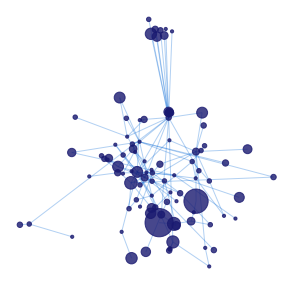

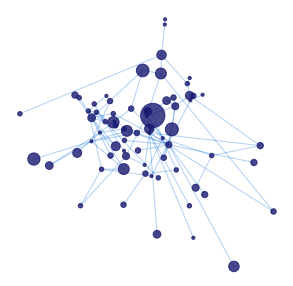

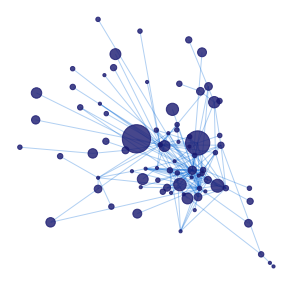

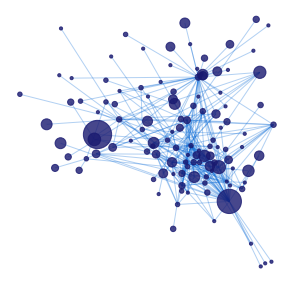

In [685]:
graph(2)
graph(3)
graph(4)
graph(7)

## Sentiment analysis

Number of communities: 14.0

Actual size of each community:
[4, 5, 21, 36, 36, 40, 47, 52, 62, 65, 70, 78, 85, 136]

Bins:
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170]


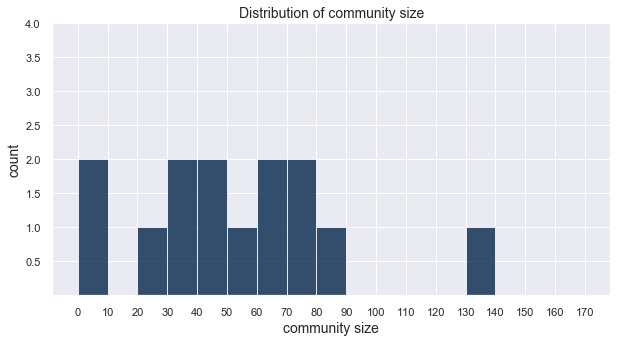

In [686]:
# get communities
partition = community.best_partition(giant, random_state=26)
size = float(len(set(partition.values())))
print(f'Number of communities: {size}')

# get communities and sizes
values = [val for val in partition.values()]
bins, counts = np.unique(values, return_counts=True)
print('\nActual size of each community:')
print(sorted(counts))

# define bins 0-10,10-20, 20-30 etc
bins_def = [x*10 for x in list(range(18))]

print('\nBins:')
print(bins_def)

# create histogram
sns.set()
plt.figure(figsize=(10, 5))
plt.hist(counts, color=blue[4], bins=bins_def, alpha=0.8)
plt.xticks(bins_def)
plt.yticks([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4])
plt.xlabel('community size', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.title('Distribution of community size', fontsize=14)
plt.show()

In [687]:
def tokenize(df,col):
    df[f'Tokens_{col}'] = ""
    for i,content in enumerate(df[col]):
        try:
            text = content.translate(str.maketrans('', '', string.punctuation)).split() # split to tokens
            sw = stopwords.words("english") # set stopwords
            wordnet_lemmatizer = WordNetLemmatizer() # set lemmatizer
            words1= [t.lower() for t in text] # lower letters
            words11 = [t for t in words1 if t not in sw]   # remove stopwords
            words2 = [wordnet_lemmatizer.lemmatize(t) for t in words11]  # lemmatize
            words3 = [x for x in words2 if not any(c.isdigit() for c in x)] # remove words with numbers
            df[f'Tokens_{col}'][i] = words3
        except:
            print(i)

### Wordclouds

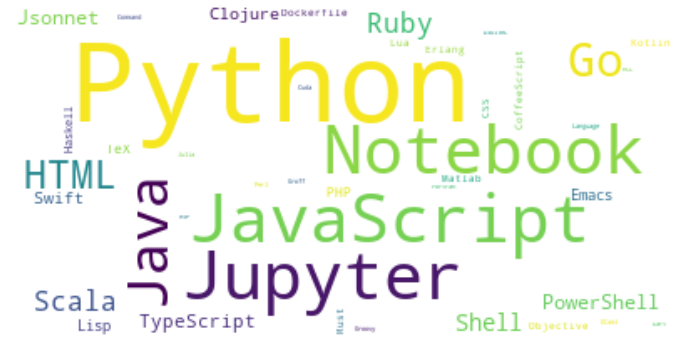

In [688]:
# create WordCloud
ll =' '.join(df['main_language'].fillna('none').tolist())
wordcloud = WordCloud(background_color='white', collocations = False).generate(ll)

# plot the WordCloud image         
plt.figure(figsize=(10, 5), facecolor = None)
img = plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.show()

In [689]:
# create WordCloud
wordcloud = WordCloud(background_color='white', collocations = False).generate_from_frequencies(TF)

# plot the WordCloud image         
plt.figure(figsize=(10, 5), facecolor = None)
img = plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.show()

NameError: name 'TF' is not defined

In [ ]:
# create WordCloud
wordcloud = WordCloud(background_color = 'white', collocations = False).generate_from_frequencies(TF_bio)

# plot the WordCloud image         
plt.figure(figsize=(10, 5),facecolor = None)
img = plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout() 
plt.show()

# Discussion
*Think critically about creation. What went well? What is still missing? What could be improved?, Why?*

# Contributions


In [ ]:
ct = pd.DataFrame({'Section 1' : ["", "", "", "", "", "", "", "", ""], 
                   'Section 2' : ["", "", "", "", "", "", "", "", ""],
                   'Section 3' : ["", "", "", "", "", "", "", "", ""],
                   'Section 4' : ["", "", "", "", "", "", "", "", ""]}, 
                   index =['Part 1','Part 2.1','Part 2.2','Part 3.1','Part 3.2','Part 3.3','Part 3.4','Part 3.5','Part 4']) 
ct

# References

[1] GitHub. En.wikipedia.org. (2020). Retrieved 23 November 2020, from https://en.wikipedia.org/wiki/GitHub.

[2] Weeks, C. (2020). Council Post: Machine Learning: The Real Buzzword Of 2020. Retrieved 23 November 2020, from https://www.forbes.com/sites/forbestechcouncil/2020/03/24/machine-learning-the-real-buzzword-of-2020/?sh=1fb640c13ea7.